# Internshala Data Science Challenge 


## Whether the customer will pay next PREMIUM or not?

## PROBLEM STATEMENT

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that you pay regularly to an insurance company for this guarantee.

 

For example, you may pay a premium of Rs. 5000 each year for a medical insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

 

Just like medical insurance, there is life insurance where every year you pay a premium of certain amount to insurance provider company so that in case of unfortunate event of your death, the insurance provider company will provide a compensation (called ‘sum assured’) to your immediate family. Similarly, there can be a variety of insurance products for different kinds of risks.

 

As you can imagine, if a large number of customers do not pay the premium on time, it might disrupt the cash flow and smooth operation for the company. A customer may stop making regular premium payments for a variety of reasons - some may forget, some may find it expensive and not worth the value, some may not have money to pay the premium etc.

 

Building a model to predict whether a customer would make the premium payment can be extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers who are less likely to pay and convince them to continue making timely payment.

## Data Dictionary

* id	= Unique ID of the policy
* perc_premium_paid_by_cash_credit	= Percentage of the  premium amount paid by cash or credit card
* age_in_days	= Age in days of policy holder
* Income	= Monthly Income of policy holder
* Count_3-6_months_late	= No of premiums late by 3 to 6 months
* Count_6-12_months_late	= No  of premiums late by 6 to 12 months
* Count_more_than_12_months_late	= No of premiums late by more than 12 months
* application_underwriting_score	= Underwriting Score of the applicant at the time of application (No applications under the score of 90 are insured)
* no_of_premiums_paid	= Total premiums paid on time till now
* sourcing_channel	= Sourcing channel for application
* residence_area_type	= Area type of Residence (Urban/Rural)
* target	= (1 - premium paid on time, 0 - otherwise)

## Solution and way of pursuing this problem.

Since its a binary target variable, either 1 or 0, its a classification problem. THe model shall learn from the train data set and will try to predict the outcome from the test data set. Different Classification models shall be applied, but before applying the model to predict the data, exploratory data analysis shall be done and see which variables are more relevant than others, i.e feature transformation, scalling and feature engineering shall be deployed before getting to the prediction part.

## Exploratory Data Analysis

In [1]:
# importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('/content/sample_data/train.csv')
train.head(5)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
train.shape

(79853, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  target                            79853 non-null  int64  
dtypes: f

### Univariate analysis & outlier detection

Simultaneously transforming them 

In [6]:
# continuous variables 
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,79853.0,57167.166368,32928.970160,2.0,28640.000,57262.000,85632.000,114076.00
perc_premium_paid_by_cash_credit,79853.0,0.314288,0.334915,0.0,0.034,0.167,0.538,1.00
age_in_days,79853.0,18846.696906,5208.719136,7670.0,14974.000,18625.000,22636.000,37602.00
Income,79853.0,208847.171177,496582.597257,24030.0,108010.000,166560.000,252090.000,90262600.00
Count_3-6_months_late,79756.0,0.248671,0.691468,0.0,0.000,0.000,0.000,13.00
Count_6-12_months_late,79756.0,0.078188,0.436507,0.0,0.000,0.000,0.000,17.00
Count_more_than_12_months_late,79756.0,0.060008,0.312023,0.0,0.000,0.000,0.000,11.00
application_underwriting_score,76879.0,99.067291,0.739799,91.9,98.810,99.210,99.540,99.89
no_of_premiums_paid,79853.0,10.863887,5.170687,2.0,7.000,10.000,14.000,60.00
target,79853.0,0.937410,0.242226,0.0,1.000,1.000,1.000,1.00


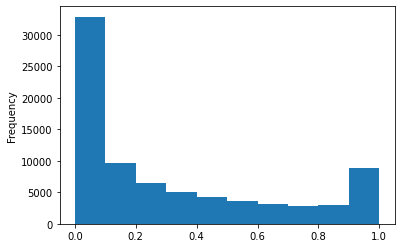

In [7]:
train['perc_premium_paid_by_cash_credit'].plot.hist()

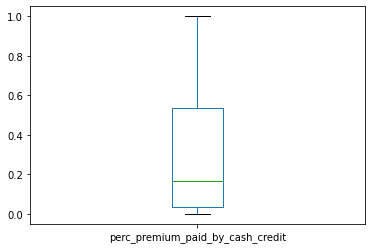

In [8]:
train['perc_premium_paid_by_cash_credit'].plot.box()

This feature does not have any outlier and its a right skewed, so transforming it using sqrt method as shown below.

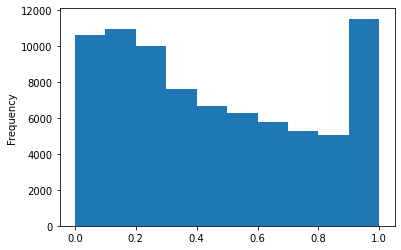

In [9]:
np.sqrt(train['perc_premium_paid_by_cash_credit']).plot.hist()

In [10]:
train['perc_premium_paid_by_cash_credit'] = np.sqrt(train['perc_premium_paid_by_cash_credit'])
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.654981,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.100000,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.957601,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.221359,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.228035,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


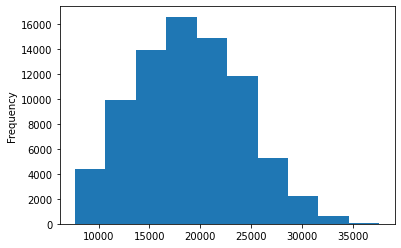

In [11]:
train['age_in_days'].plot.hist()

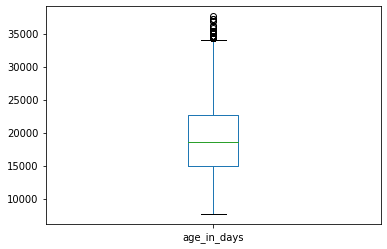

In [12]:
train['age_in_days'].plot.box()

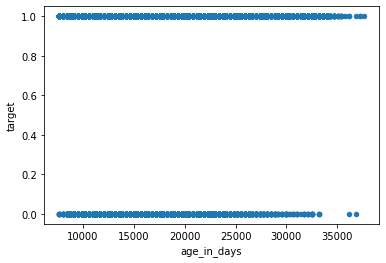

In [13]:
train.plot.scatter('age_in_days', 'target')

There seems to be that there are people who are older than 100 years in the feature. And people in this age usually do not pay premium for the insurance, instead are the ones who uses their insurance at this age. The peercentage of these people are quite few, as it can be seen that there are 20 such people who has their ages very close to 100 years.

The graph also seems to be normally distributed with some outliers. 

In [14]:
# replacing the outliers having values greater than 30000 (80years) with the mean value
train.loc[train['age_in_days']>30000, 'age_in_days'] = np.mean(train['age_in_days'])
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.654981,12058.000000,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.100000,21546.000000,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.957601,17531.000000,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.221359,15341.000000,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.228035,18846.696906,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


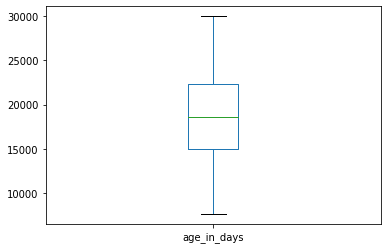

In [15]:
train['age_in_days'].plot.box()

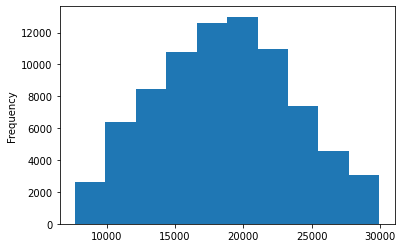

In [16]:
train['age_in_days'].plot.hist()

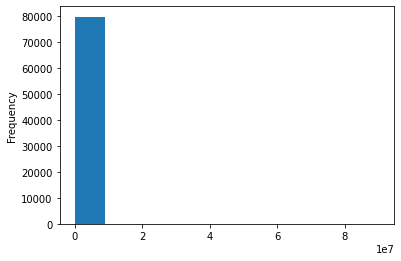

In [17]:
train['Income'].plot.hist()

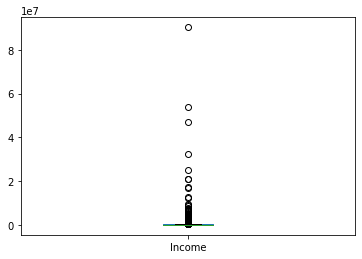

In [18]:
train.Income.plot.box()

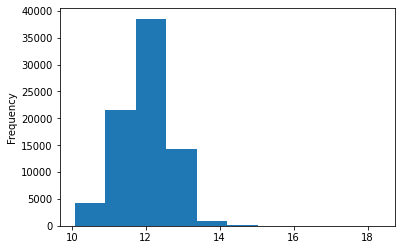

In [19]:
np.log(train['Income']).plot.hist()

In [20]:
train['Income'] = np.log(train['Income'])
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.654981,12058.000000,12.780042,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.100000,21546.000000,12.660804,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.957601,17531.000000,11.340237,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.221359,15341.000000,12.431254,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.228035,18846.696906,12.199451,0.0,0.0,0.0,99.87,12,B,Urban,1


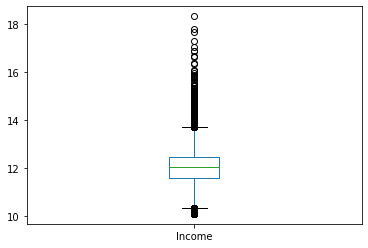

In [21]:
train.Income.plot.box()

In [22]:
train[train['Income']>= 16]

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
4414,101234,0.530094,18623.0,16.089707,0.0,0.0,0.0,99.49,29,A,Urban,1
4713,74741,0.000000,24828.0,17.801191,0.0,0.0,0.0,99.89,17,A,Urban,1
6007,11580,0.404969,16070.0,17.661461,0.0,0.0,0.0,99.89,14,C,Urban,1
6971,6552,0.083666,18991.0,18.318234,0.0,0.0,0.0,NaN,12,D,Urban,1
11298,60042,0.419524,16065.0,16.321046,0.0,0.0,0.0,99.84,8,D,Urban,1
18507,15041,0.282843,22272.0,16.641285,0.0,0.0,0.0,NaN,9,B,Rural,1
19764,111295,0.077460,16437.0,16.025984,0.0,0.0,0.0,99.60,20,A,Urban,1
33901,41053,0.268328,18256.0,16.863604,0.0,0.0,0.0,99.88,14,C,Rural,1
42852,71969,0.189737,15707.0,16.368664,0.0,0.0,0.0,99.89,15,B,Rural,1
50282,112928,0.684836,16072.0,17.286703,1.0,0.0,0.0,99.89,11,B,Rural,1


For now, letting the outliers in Income feature to be as it is, coz Income in real life do tend to follow in such a fashion, if I replace the outliers then there are schances that I might be following income equality principle, which is not correct in the current context.

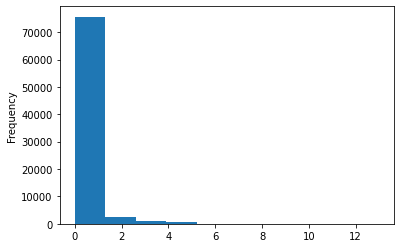

In [23]:
train['Count_3-6_months_late'].plot.hist()

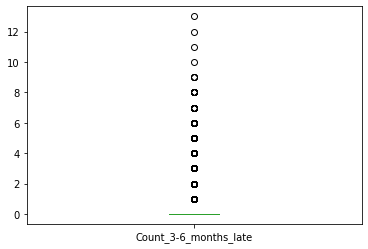

In [24]:
train['Count_3-6_months_late'].plot.box()

In [25]:
train['Count_3-6_months_late'].value_counts()

0.0     66801
1.0      8826
2.0      2519
3.0       954
4.0       374
5.0       168
6.0        68
7.0        23
8.0        15
9.0         4
11.0        1
12.0        1
13.0        1
10.0        1
Name: Count_3-6_months_late, dtype: int64

In [26]:
train['Count_6-12_months_late'].value_counts()

0.0     75831
1.0      2680
2.0       693
3.0       317
4.0       130
5.0        46
6.0        26
7.0        11
8.0         5
10.0        4
9.0         4
14.0        2
11.0        2
13.0        2
17.0        1
12.0        1
15.0        1
Name: Count_6-12_months_late, dtype: int64

In [27]:
train['Count_more_than_12_months_late'].value_counts()

0.0     76038
1.0      2996
2.0       498
3.0       151
4.0        48
5.0        13
6.0         6
7.0         3
8.0         2
11.0        1
Name: Count_more_than_12_months_late, dtype: int64

It is these features = Count_3-6_months_late, Count_6-12_months_late, Count_more_than_12_months_late, that are continuous variables, although they have discrete values, so am leaving them as is. Transforming them, did not help in bringing them closer to normal distributions.

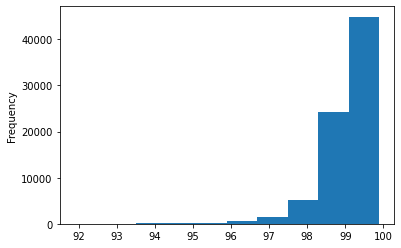

In [28]:
train['application_underwriting_score'].plot.hist()

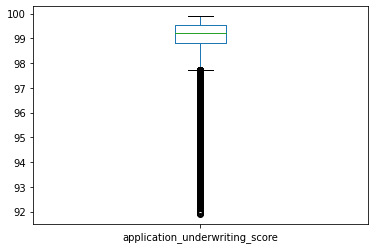

In [29]:
train['application_underwriting_score'].plot.box()

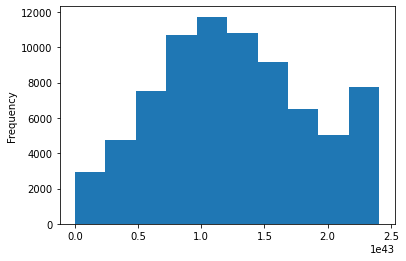

In [30]:
np.exp(train['application_underwriting_score']).plot.hist()

In [31]:
train['application_underwriting_score'] = np.exp(train['application_underwriting_score'])
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.654981,12058.000000,12.780042,0.0,0.0,0.0,1.008880e+43,13,C,Urban,1
1,41492,0.100000,21546.000000,12.660804,0.0,0.0,0.0,2.408107e+43,21,A,Urban,1
2,31300,0.957601,17531.000000,11.340237,2.0,3.0,1.0,7.253079e+42,7,C,Rural,0
3,19415,0.221359,15341.000000,12.431254,0.0,0.0,0.0,1.748645e+43,9,A,Urban,1
4,99379,0.228035,18846.696906,12.199451,0.0,0.0,0.0,2.360423e+43,12,B,Urban,1


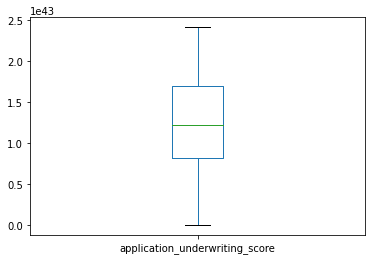

In [32]:
train['application_underwriting_score'].plot.box()

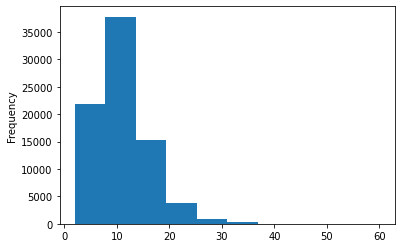

In [33]:
train['no_of_premiums_paid'].plot.hist()

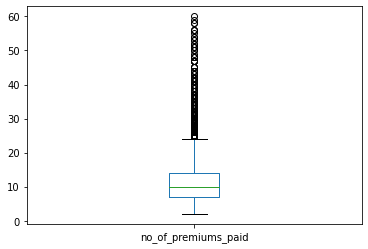

In [34]:
train['no_of_premiums_paid'].plot.box()

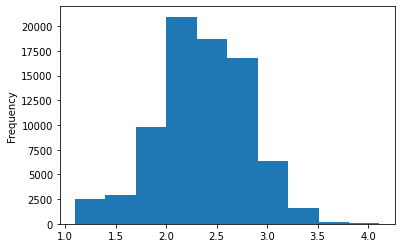

In [35]:
np.log1p(train['no_of_premiums_paid']).plot.hist()

In [36]:
train['no_of_premiums_paid'] = np.log1p(train['no_of_premiums_paid'])
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.654981,12058.000000,12.780042,0.0,0.0,0.0,1.008880e+43,2.639057,C,Urban,1
1,41492,0.100000,21546.000000,12.660804,0.0,0.0,0.0,2.408107e+43,3.091042,A,Urban,1
2,31300,0.957601,17531.000000,11.340237,2.0,3.0,1.0,7.253079e+42,2.079442,C,Rural,0
3,19415,0.221359,15341.000000,12.431254,0.0,0.0,0.0,1.748645e+43,2.302585,A,Urban,1
4,99379,0.228035,18846.696906,12.199451,0.0,0.0,0.0,2.360423e+43,2.564949,B,Urban,1


In [37]:
# catogorical variables 
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                         float64
Income                              float64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                 float64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [38]:
train['sourcing_channel'].value_counts()

A    43134
B    16512
C    12039
D     7559
E      609
Name: sourcing_channel, dtype: int64

In [39]:
train['sourcing_channel'].value_counts() / len(train['sourcing_channel'])

A    0.540168
B    0.206780
C    0.150765
D    0.094661
E    0.007627
Name: sourcing_channel, dtype: float64

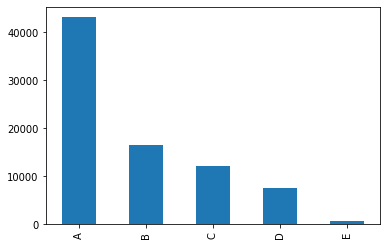

In [40]:
train['sourcing_channel'].value_counts().plot.bar()

In [41]:
train['residence_area_type'].value_counts()

Urban    48183
Rural    31670
Name: residence_area_type, dtype: int64

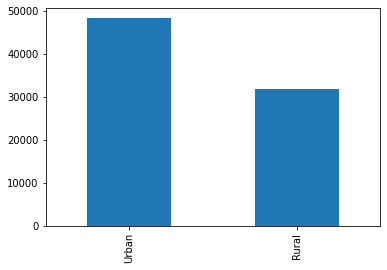

In [42]:
train['residence_area_type'].value_counts().plot.bar()

### Bivariate Analysis

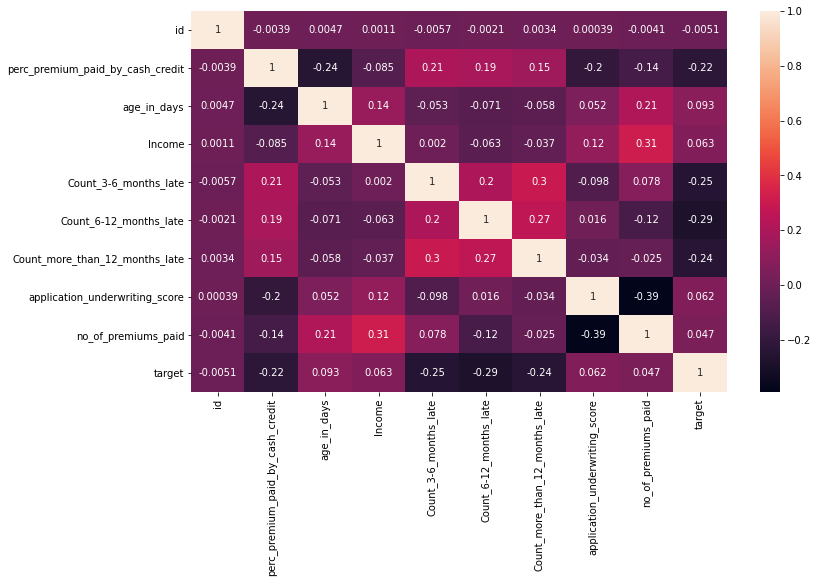

In [43]:
# continuous - continuous (Scatter, corr)
# continuous - object (barplot)
cor = train.corr()
plt.figure(figsize=(12,7))
sns.heatmap(cor, annot=True)

* no_of_premiums_paid has a high negative correlation with application_underwriting_score
* The target feature has negative correlativity with per_premium_paid_by_cash_credit, and the count columns of paying the premium late. 

Darker the color, higher the corelation with each other. 

In [44]:
pd.crosstab(train['residence_area_type'], train['target'])

target,0,1
residence_area_type,,
Rural,1998,29672
Urban,3000,45183


In [45]:
from scipy.stats import ttest_ind 
rural = train[train['residence_area_type'] == 'Rural']
urban = train[train['residence_area_type'] == 'Urban']
ttest_ind(rural['target'], urban['target'], nan_policy='omit')

Ttest_indResult(statistic=-0.471091940585662, pvalue=0.6375763671544947)

#### Hypothesis test

* Null: Urban people pay their premium on time.
* Alternate: Both rural and urban people have exactly the same ratio of paying.

But from the above result, the value of p is much higher than 0.05, therefore the null hypothesis can be rejected and said that people from any type of residence have the same percentage whether they will pay the premium on time or not. 

In [46]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(train['residence_area_type'], train['target']))

(0.2080863817891421,
 0.6482714305747836,
 1,
 array([[ 1982.22558952, 29687.77441048],
        [ 3015.77441048, 45167.22558952]]))

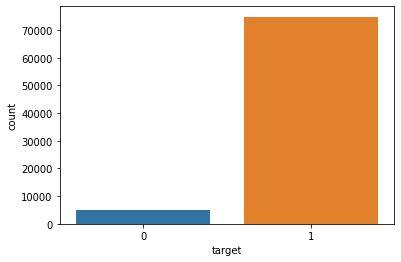

In [47]:
# checking how many paid premiums 
sns.countplot(x='target', data=train)

Seems like most of the people have paid their premium on time, very few have not paid in time. This also shows that the target variable (dependent feature) is skewed, so might have to transform it so that the lesser values also have a significant value in the feature.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Late in paying premium (months)')

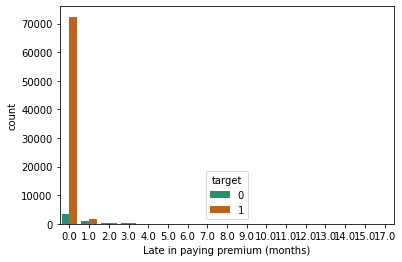

In [48]:
sns.countplot('Count_6-12_months_late', data=train, hue='target', palette='Dark2')
plt.xlabel('Late in paying premium (months)')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Late in paying premium (months)')

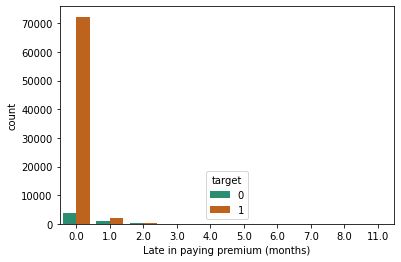

In [49]:
sns.countplot('Count_more_than_12_months_late', data=train, hue='target', palette='Dark2')
plt.xlabel('Late in paying premium (months)')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Late in paying premium (months)')

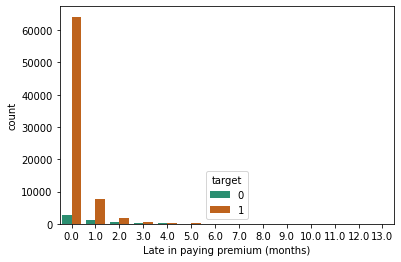

In [50]:
sns.countplot('Count_3-6_months_late', data=train, hue='target', palette='Dark2')
plt.xlabel('Late in paying premium (months)')

From all tthe above three plots, its clearly visible that people have high chances of not paying in initial months, yet that does not mean, the majority of people shall fail to pay the premium on time, as its seen otherwise with the orange vertical bar.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


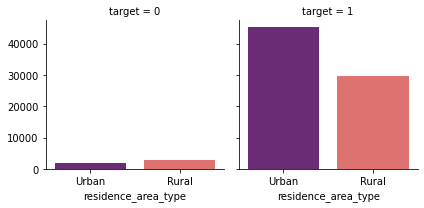

In [51]:
grid = sns.FacetGrid(data=train, col='target')
grid.map(sns.countplot, 'residence_area_type', palette='magma')

people from rural and urban area have almost same percentage of not paying the premium, but the good thing is the people not paying the premium on time are very few based on their residency.

In [52]:
# sns.pairplot(train, hue ='target')

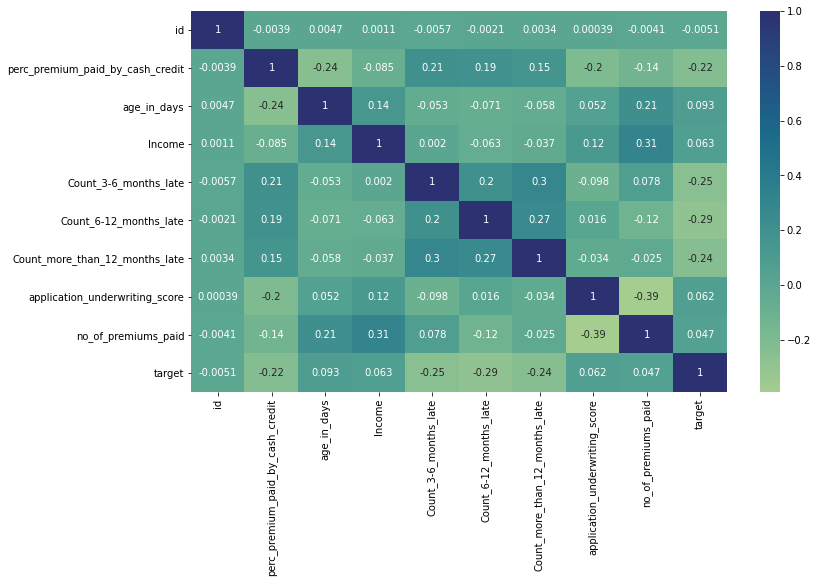

In [53]:
plt.figure(figsize=(12,7))
sns.heatmap(train.corr(), annot=True, cmap='crest')

As from the heatmap following corelations can be sited:
* Count_3_6_months_late, Count_6_12_months_late and Count_more_tan_12_months_late have a positive coorelation with per_premium_paid_by_cash_credit. This also can show that there might be multicollinearity between the three columns. 
* Target feature has high negative coreelation with per_premium_paid_by_cash_credit.
* Target feature also has high negative corelation with Count_3_6_months_late, Count_6_12_months_late and Count_more_tan_12_months_late. (Agian, showing signs of multicollinearity). 
* Age also has important role to play as it has both positive correlation and negative correlations with no_of_premiums_paid and per_premium_paid_by_cas_credit.

# Cleaning data for both test and train dataset

In [54]:
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

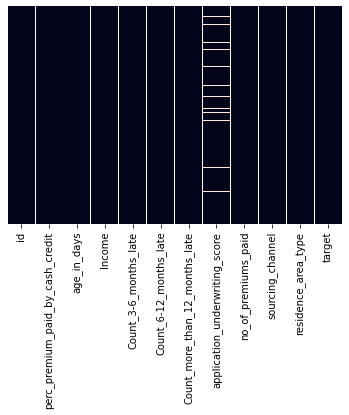

In [55]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [56]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,79853.0,5.716717e+04,3.292897e+04,2.000000e+00,2.864000e+04,5.726200e+04,8.563200e+04,1.140760e+05
perc_premium_paid_by_cash_credit,79853.0,4.605739e-01,3.196258e-01,0.000000e+00,1.843909e-01,4.086563e-01,7.334848e-01,1.000000e+00
age_in_days,79853.0,1.861751e+04,4.910698e+03,7.670000e+03,1.497400e+04,1.862500e+04,2.227400e+04,2.994500e+04
Income,79853.0,1.200378e+01,6.605315e-01,1.008706e+01,1.158998e+01,1.202311e+01,1.243754e+01,1.831823e+01
Count_3-6_months_late,79756.0,2.486709e-01,6.914681e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01
Count_6-12_months_late,79756.0,7.818847e-02,4.365074e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01
Count_more_than_12_months_late,79756.0,6.000802e-02,3.120227e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01
application_underwriting_score,76879.0,1.262575e+43,6.032409e+42,8.159488e+39,8.177824e+42,1.219988e+43,1.696964e+43,2.408107e+43
no_of_premiums_paid,79853.0,2.381696e+00,4.355479e-01,1.098612e+00,2.079442e+00,2.397895e+00,2.708050e+00,4.110874e+00
target,79853.0,9.374100e-01,2.422256e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


application_underwriting_Score has the most null values and from the above table it can be said that the using the mean value for filling this null values would be good because most of the values lies between 91 and 99.

And for the other three columns hgave almost the same number of values missing i.e. 97, dropping them would be a good idea coz they also seem to show signs of multicolinearity, but isnstead of dropping those, lets use the median values for it.

In [57]:
train['application_underwriting_score'] = train['application_underwriting_score'].fillna(
    train['application_underwriting_score'].mean())

train['Count_3-6_months_late'] = train['Count_3-6_months_late'].fillna(
    train['Count_3-6_months_late'].median())

train['Count_6-12_months_late'] = train['Count_6-12_months_late'].fillna(
    train['Count_6-12_months_late'].median())

train['Count_more_than_12_months_late'] = train['Count_more_than_12_months_late'].fillna(
    train['Count_more_than_12_months_late'].median()) 

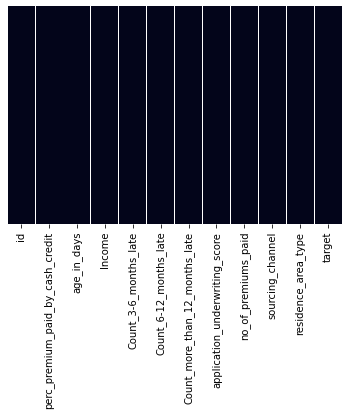

In [58]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [59]:
# train.dropna()

In [60]:
# test data set
test = pd.read_csv('/content/sample_data/test.csv')
test.tail()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
34219,81988,0.227,20810,110240,0.0,0.0,0.0,97.52,9,A,Urban
34220,30326,0.157,19353,125090,0.0,0.0,0.0,99.62,7,A,Rural
34221,65749,0.325,18264,196570,0.0,0.0,0.0,98.58,14,B,Rural
34222,65686,0.983,16798,212150,1.0,0.0,1.0,98.88,10,A,Urban
34223,93826,0.005,24467,89190,1.0,0.0,0.0,98.00,11,A,Urban


In [61]:
test.shape

(34224, 11)

In [62]:
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [63]:

# again doing the same like what I did with the train dataset
# same coz, the same features have the values missing

test['application_underwriting_score'] = test['application_underwriting_score'].fillna(
    test['application_underwriting_score'].mean())

test['Count_3-6_months_late'] = test['Count_3-6_months_late'].fillna(
    test['Count_3-6_months_late'].median())

test['Count_6-12_months_late'] = test['Count_6-12_months_late'].fillna(
    test['Count_6-12_months_late'].median())

test['Count_more_than_12_months_late'] = test['Count_more_than_12_months_late'].fillna(
    test['Count_more_than_12_months_late'].median()) 

In [64]:
test.shape

(34224, 11)

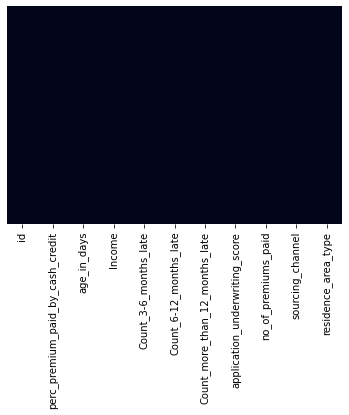

In [65]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)

In [66]:
test.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

In [67]:
# dropping the id column from from both the train and test data set

train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)
train.shape, test.shape

((79853, 11), (34224, 10))

In [70]:
# splitting into dependent and independent features

x = train.drop(['target'], axis=1)
y = train['target']
x.shape, y.shape

((79853, 10), (79853,))

In [71]:
# one-hot catogorical columns
x = pd.concat([x, pd.get_dummies(train[['sourcing_channel', 
                                               'residence_area_type']])],axis=1)
x.drop(['sourcing_channel', 'residence_area_type'], axis=1, inplace=True)
x.isnull().sum()

perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel_A                  0
sourcing_channel_B                  0
sourcing_channel_C                  0
sourcing_channel_D                  0
sourcing_channel_E                  0
residence_area_type_Rural           0
residence_area_type_Urban           0
dtype: int64

In [72]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
# transform data
x = pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.608237,-1.335767,1.175218,-0.359383,-0.179012,-0.192199,-0.428612,0.590895,-1.083838,-0.510572,2.373365,-0.323356,-0.087665,-0.810732,0.810732
1,-1.128120,0.596353,0.994698,-0.359383,-0.179012,-0.192199,1.935358,1.628640,0.922647,-0.510572,-0.421343,-0.323356,-0.087665,-0.810732,0.810732
2,1.555038,-0.221255,-1.004563,2.534563,6.697811,3.014592,-0.907703,-0.693968,-1.083838,-0.510572,2.373365,-0.323356,-0.087665,1.233454,-1.233454
3,-0.748425,-0.667223,0.647173,-0.359383,-0.179012,-0.192199,0.821207,-0.181636,0.922647,-0.510572,-0.421343,-0.323356,-0.087665,-0.810732,0.810732
4,-0.727539,0.046671,0.296236,-0.359383,-0.179012,-0.192199,1.854797,0.420745,-1.083838,1.958586,-0.421343,-0.323356,-0.087665,-0.810732,0.810732


In [73]:
x.shape

(79853, 15)

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=4,
                                                    stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((63882, 15), (15971, 15), (63882,), (15971,))

In [75]:
test = pd.concat([test, pd.get_dummies(test[['sourcing_channel', 
                                              'residence_area_type']])],axis=1)
test.drop(['sourcing_channel', 'residence_area_type'], axis=1, inplace=True)
test.isnull().sum()

perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel_A                  0
sourcing_channel_B                  0
sourcing_channel_C                  0
sourcing_channel_D                  0
sourcing_channel_E                  0
residence_area_type_Rural           0
residence_area_type_Urban           0
dtype: int64

In [76]:
# transform data
test = pd.DataFrame(scaler.transform(test))

# Models
## Logistic Regression


Mean cross validation score  0.939591756261704

Accuracy on test data  0.9378248074635277

Accuracy on train data  0.9397482859021321



Classification Report :
               precision    recall  f1-score   support

           0       0.51      0.12      0.20      1000
           1       0.94      0.99      0.97     14971

    accuracy                           0.94     15971
   macro avg       0.73      0.56      0.58     15971
weighted avg       0.92      0.94      0.92     15971



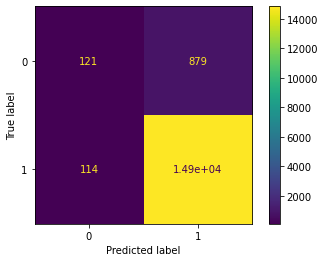

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

logr = LogisticRegression(max_iter=250)

logr.fit(x_train, y_train)

cross_val = (cross_val_score(logr, x_train, y_train, cv=5))

pred1 = logr.predict(x_test)

cfr = classification_report(y_test, pred1)

print('\nMean cross validation score ',np.mean(cross_val))

print('\nAccuracy on test data ', logr.score(x_test,y_test))

print('\nAccuracy on train data ', logr.score(x_train,y_train))

print('\n')

print(plot_confusion_matrix(logr,x_test, y_test,values_format='0.3g'))

print('\nClassification Report :\n',cfr)

## Decision Tree


Mean cross validation score  0.8986100217060937

Accuracy on train data  1.0

Accuracy on test data  0.8958111577233736



Classification Report :
               precision    recall  f1-score   support

           0       0.21      0.24      0.22      1000
           1       0.95      0.94      0.94     14971

    accuracy                           0.90     15971
   macro avg       0.58      0.59      0.58     15971
weighted avg       0.90      0.90      0.90     15971



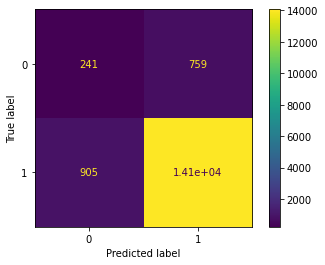

In [87]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=4)

dt.fit(x_train, y_train)

cross_val = (cross_val_score(dt, x_train, y_train, cv=5))

pred2 = dt.predict(x_test)

print('\nMean cross validation score ',np.mean(cross_val))

print('\nAccuracy on train data ', dt.score(x_train,y_train))

print('\nAccuracy on test data ', dt.score(x_test,y_test))

print('\n')

print(plot_confusion_matrix(dt,x_test, y_test,values_format='0.3g'))

cfr = classification_report(y_test, pred2)
print('\nClassification Report :\n',cfr)

## K-means

In [90]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

kmeans.fit(x_train, y_train)

cross_val = (cross_val_score(kmeans, x_train, y_train, cv=5))

pred3 = kmeans.predict(x_test)

print('\nMean cross validation score ',np.mean(cross_val))

print('\nAccuracy on train data ', kmeans.score(x_train,y_train))

print('\nAccuracy on test data ', kmeans.score(x_test,y_test))

print('\n')

# print(plot_confusion_matrix(kmeans, x_test, y_test, values_format='0.3g'))

cfr = classification_report(y_test, pred3)
print('\nClassification Report :\n',cfr)


Mean cross validation score  -165583.36251008505

Accuracy on train data  -827852.3400602594

Accuracy on test data  -210230.24029989514



Classification Report :
               precision    recall  f1-score   support

           0       0.06      0.62      0.12      1000
           1       0.94      0.40      0.56     14971

    accuracy                           0.41     15971
   macro avg       0.50      0.51      0.34     15971
weighted avg       0.88      0.41      0.53     15971



In [91]:
kmeans.inertia_

827852.3400602599

In [93]:
SSE = []

for cluster in range(1,20):
  kmeans = KMeans(n_jobs=-1, n_clusters=cluster)
  kmeans.fit(x_train, y_train)
  SSE.append(kmeans.inertia_)

In [94]:
frame = pd.DataFrame({'cluster': range(1,20), 
                      'SSE': SSE})
frame

,cluster,SSE
0,1,955663.473983
1,2,827852.340060
2,3,760615.110314
3,4,693397.639229
4,5,624213.860920
5,6,572191.855532
6,7,507667.443017
7,8,482223.109362
8,9,457960.252269
9,10,439288.055384


Text(0, 0.5, 'SSE')

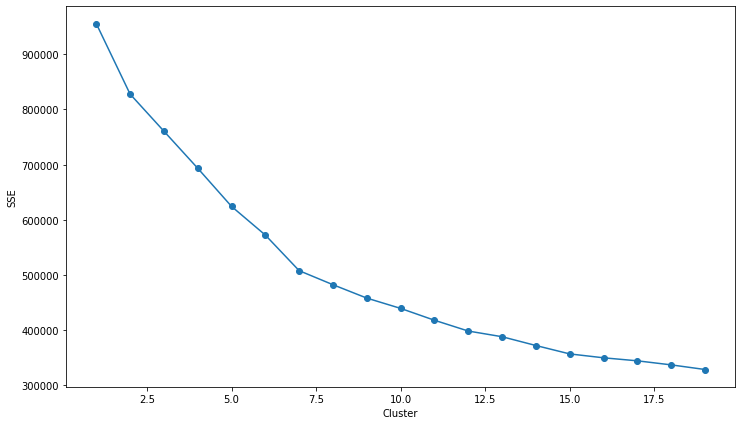

In [95]:
plt.figure(figsize=(12,7))
plt.plot(frame['cluster'], frame['SSE'], marker='o')
plt.xlabel('Cluster')
plt.ylabel('SSE')

In [107]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(x_train, y_train)

cross_val = (cross_val_score(kmeans, x_train, y_train, cv=5))

pred4 = kmeans.predict(x_test)

print('\nMean cross validation score ',np.mean(cross_val))

print('\nAccuracy on train data ', kmeans.score(x_train,y_train))

print('\nAccuracy on test data ', kmeans.score(x_test,y_test))

print('\n')

# print(plot_confusion_matrix(logr,x_test, y_test,values_format='0.3g'))

cfr = classification_report(y_test, pred4)
print('\nClassification Report :\n',cfr)


Mean cross validation score  -139200.68607968904

Accuracy on train data  -695754.5086404333

Accuracy on test data  -177325.45402827483



Classification Report :
               precision    recall  f1-score   support

           0       0.08      0.12      0.10      1000
           1       0.94      0.46      0.62     14971
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.44     15971
   macro avg       0.26      0.15      0.18     15971
weighted avg       0.89      0.44      0.58     15971



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Evaluation



In [108]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, pred1)
score2 = accuracy_score(y_test, pred2)
score3 = accuracy_score(y_test, pred4)

results = pd.DataFrame([
                        ['LogisticRegression', score1],
                        ['DecisionTree', score2],
                        ['Kmeans', score3]
])
results

,0,1
0,LogisticRegression,0.937825
1,DecisionTree,0.895811
2,Kmeans,0.437731


In [117]:
# submitting
pred_test = logr.predict(test)
pred = pd.DataFrame(pred_test)
sub_df = pd.read_csv('/content/sample_data/sample_submission.csv')
datasets = pd.concat([sub_df['id'], pred], axis=1)
datasets.columns = ['id', 'target']
datasets.to_csv('sample_submission1.csv', index=False)
datasets.head()

,id,target
0,649,1
1,81136,1
2,70762,1
3,53935,1
4,15476,1


# Conclusion

From the above predicted table its clear that Logistic Regression performs much better than the other two models. Yet there be might be problems of overfitting in all the three models. So, therefore going forth, all the three models can be tuned based on hyperparameters to find some more accuracy and predicting the results better. Like as shown below.

In [112]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

logr2 = LogisticRegression()

# parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# defining grid search
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=4)
grid_search = GridSearchCV(estimator=logr2, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy', error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarizing results 
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("\n%f (%f) with: %r" % (mean, stdev, param))

Best: 0.939712 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

0.939696 (0.001425) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

0.939696 (0.001425) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

0.939696 (0.001425) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

0.939696 (0.001425) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

0.939696 (0.001425) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

0.939696 (0.001425) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

0.939691 (0.001421) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

0.939691 (0.001421) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}

0.939691 (0.001421) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

0.939712 (0.001424) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

0.939712 (0.001424) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

0.939691 (0.001391) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

0.939654 (